In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Weather Data in India from 1901 to 2017.csv')

In [3]:
df = df.drop(['JAN', 'FEB', 'MAR'], axis=1)
df.dropna()
df.reset_index(inplace=True, drop=True)
df = df[df['APR']>0]
df

,Unnamed: 0,YEAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [4]:
df.describe()

,Unnamed: 0,YEAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


Text(0.5, 1.0, 'Correlation between Variables')

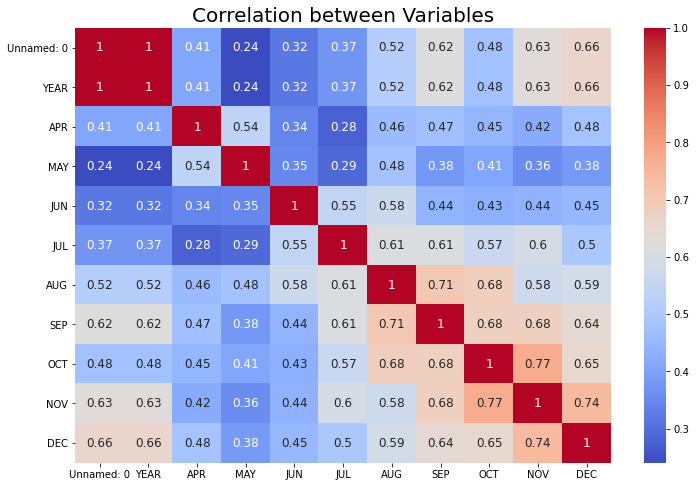

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12,8))
g= sns.heatmap(corr,ax=ax, annot= True, cmap='coolwarm', annot_kws={'size':12}) # or greys, coolwarm
ax.set_title('Correlation between Variables', size= 20)

In [6]:
df.dropna()

,Unnamed: 0,YEAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [8]:
x = df[df.columns[df.columns != 'MAY']]
y = df.MAY
 
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MAY   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     7.246
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           3.62e-08
Time:                        22:10:48   Log-Likelihood:                -86.308
No. Observations:                 117   AIC:                             192.6
Df Residuals:                     107   BIC:                             220.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.919e-06   2.65e-06      1.103      0.2

In [9]:
df = df.dropna()

In [11]:
x.drop(columns = ['','JUN', 'JUL'],axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MAY   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     6.313
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           9.93e-06
Time:                        22:11:56   Log-Likelihood:                -96.839
No. Observations:                 117   AIC:                             207.7
Df Residuals:                     110   BIC:                             227.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.193e-06   2.54e-06      1.259      0.2

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4541275652917467


In [13]:
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
coefficients

,0,0
0,const,0.000000
1,Unnamed: 0,-0.001163
2,YEAR,-0.001163
3,AUG,0.626586
4,SEP,0.069522
5,OCT,0.003095
6,NOV,0.021472
7,DEC,0.193724
